<a href="https://colab.research.google.com/github/mondalsnehankur/Quantum-Mechanics-Simulation_Python/blob/main/Hatom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hatom 1s,2s,3s

plotting energies

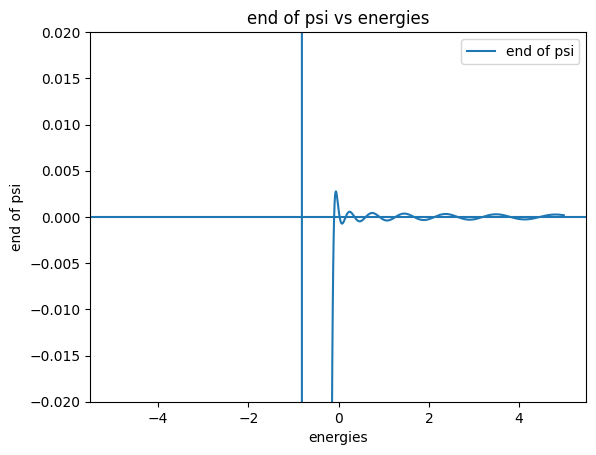

In [ ]:
from scipy.integrate import simps,odeint
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import bisect
def Hatom(w,r,E,l):
  u,v=w
  #f1,f2=v,(l*(l+1)/r**2-2/r-E)*u
  f1,f2=v,(l*(l+1)/r**2-2/r*np.exp(-r/10)-E)*u
  return(f1,f2)
def shoot(E):
  sol=odeint(Hatom,w,r,args=(E,l))
  return sol[:,0][-1]

r=np.linspace(1.0e-10,20,1000)
l=0
E=-1.0
w=[0.0,0.001]
energies=np.arange(-5,5,0.01)
hits=[shoot(E) for E in energies]

plt.plot(energies,hits,label='end of psi')
plt.axhline()
plt.ylim(-0.02,0.02)
plt.ylabel('end of psi')
plt.xlabel('energies')
plt.legend()
plt.title('end of psi vs energies')
plt.show()

finding eigen values

In [ ]:
r=np.logspace(-6,2,1000)
rr=r[::-1]
energies=-1.2/np.arange(1,20,0.2)**2
n=energies.size
L=0
def shoot(En):
  sol=odeint(Hatom,w,rr,args=(En,L))
  return sol[:,0][-1]
print('Eigen Energies')
En0=energies[0]
u0=shoot(En0)
for i in range(1,n):
  u1=shoot(energies[i])
  if u1*u0<0:
    E=bisect(shoot,energies[i-1],energies[i])
  u0=u1
  if En0 != E:
    print(E,end=' ')
    En0=E

Eigen Energies
-1.0 -0.8141121073525456 -0.09985612299183089 -0.006415985128075286 

plotting eigen finctions

E1= -1.0
E2= -0.8141121073474641


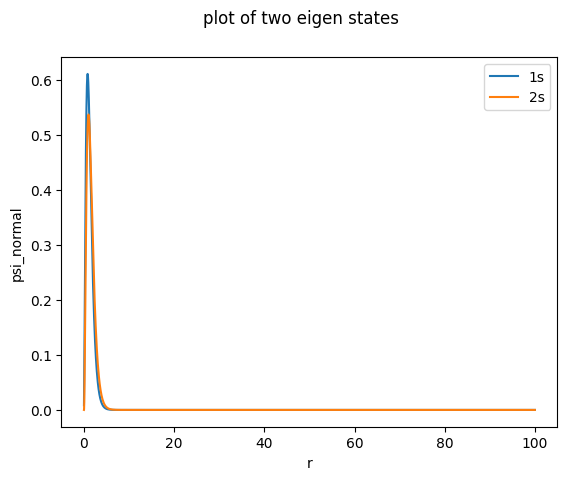

In [ ]:
#En=bisect(shoot,-0.9,-1.1)
print('E1=',En)
#En=-1.0
sol=odeint(Hatom,w,rr,args=(-1.0,l))
psi=sol[:,0][::-1]
N=(simps(psi*psi,r))
psi_normal1=(1/np.sqrt(N))*psi
#plt.subplot(1,2,1)

En=bisect(shoot,-0.82,-0.80)
print('E2=',En)
sol=odeint(Hatom,w,rr,args=(En,l))
psi=sol[:,0][::-1]
N=(simps(psi*psi,r))
psi_normal=(1/np.sqrt(N))*psi
#plt.subplot(1,2,2)
#plt.plot(r,psi_normal*psi_normal)
plt.plot(r,psi_normal1*psi_normal1,label='1s')
plt.plot(r,psi_normal*psi_normal,label='2s')
plt.ylabel('psi_normal')
plt.xlabel('r')
plt.legend()
plt.suptitle('plot of two eigen states')
plt.show()
